# Prior predictive checking the scDEF model
How does the marginal distribution of the data change when we use a Poisson-Gamma factorization versus Poisson-Gamma-Gamma factorization?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Poisson model
$$
x_{n} \sim Poisson\left(\lambda\right) 
$$

In [43]:
n_samples = 100_000
poisson_rate = 10

theoretical_mean = 10
theoretical_var = 10

x_samples = np.random.poisson(poisson_rate, size=n_samples)

empirical_mean = np.mean(x_samples)
empirical_var = np.var(x_samples)
print(f"With {n_samples} MC samples")
print(f"Empirical mean: {empirical_mean}")
print(f"Empirical var: {empirical_var}")

With 100000 MC samples
Empirical mean: 10.007
Empirical var: 10.008751


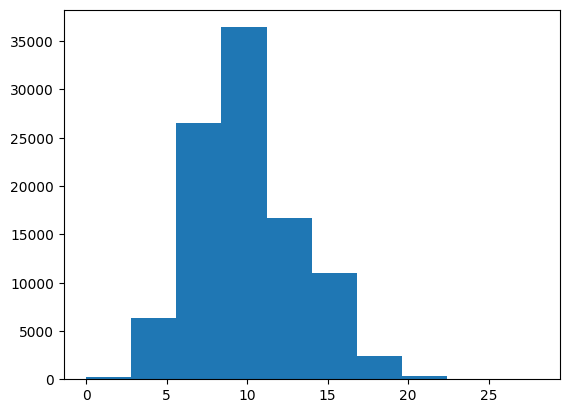

In [44]:
plt.hist(x_samples)
plt.show()

## Poisson-Gamma mixture
$$
z_{n} \sim \Gamma\left(\alpha, \beta\right)
$$

$$
x_{n} \sim Poisson\left(z_{n}\right) 
$$

In [20]:
n_samples = 100_000
alpha = 10
beta = 1

theoretical_mean = alpha/beta
# theoretical_var = 

z_samples = np.random.gamma(alpha, 1./beta, size=n_samples)
x_samples = np.random.poisson(z_samples)

empirical_mean = np.mean(x_samples)
empirical_var = np.var(x_samples)
print(f"With {n_samples} MC samples")
print(f"Empirical mean: {empirical_mean}")
print(f"Empirical var: {empirical_var}")

With 100000 MC samples
Empirical mean: 10.01572
Empirical var: 20.003872881600003


# Poisson with product of two Gammas
$$
z^1_{n} \sim \Gamma\left(\alpha_1, \beta_1\right), \qquad
z^2_{n} \sim \Gamma\left(\alpha_2, \beta_2\right)
$$

$$
x_{n} \sim Poisson\left(z^1_{n} * z^2_{n}\right) 
$$

In [28]:
n_samples = 100_000
alpha_1 = 1
beta_1 = 1
alpha_2 = 1
beta_2 = 1

# theoretical_mean = alpha/beta
# theoretical_var = 

z1_samples = np.random.gamma(alpha_1, 1./beta_1, size=n_samples)
z2_samples = np.random.gamma(alpha_1, 1./beta_2, size=n_samples)
x_samples = np.random.poisson(z1_samples * z2_samples)

empirical_mean = np.mean(x_samples)
empirical_var = np.var(x_samples)
print(f"With {n_samples} MC samples")
print(f"Empirical mean: {empirical_mean}")
print(f"Empirical var: {empirical_var}")

With 100000 MC samples
Empirical mean: 1.00861
Empirical var: 4.0519158679


# Gamma with Gamma rate
$$
z_{n} \sim \Gamma\left(\alpha, \beta\right)
$$

$$
x_{n} \sim \Gamma\left(a, b / z_{n} \right) 
$$

In [29]:
n_samples = 100_000
alpha = 1
beta = 1
a = 1
b = 1

# theoretical_mean = alpha/beta
# theoretical_var = 

z_samples = np.random.gamma(alpha, 1./beta, size=n_samples)
x_samples = np.random.gamma(a, 1./(b/z_samples))

empirical_mean = np.mean(x_samples)
empirical_var = np.var(x_samples)
print(f"With {n_samples} MC samples")
print(f"Empirical mean: {empirical_mean}")
print(f"Empirical var: {empirical_var}")

With 100000 MC samples
Empirical mean: 0.9984828524947109
Empirical var: 2.937845535832618


# Gamma with product of two Gammas
$$
z^1_{n} \sim \Gamma\left(\alpha_1, \beta_1\right), \qquad
z^2_{n} \sim \Gamma\left(\alpha_2, \beta_2\right)
$$

$$
x_{n} \sim \Gamma\left(a, b/(z^1_{n} * z^2_{n})\right) 
$$

In [30]:
n_samples = 100_000
alpha_1 = 1
beta_1 = 1
alpha_2 = 1
beta_2 = 1
a = 1
b = 1

# theoretical_mean = alpha/beta
# theoretical_var = 

z1_samples = np.random.gamma(alpha_1, 1./beta_1, size=n_samples)
z2_samples = np.random.gamma(alpha_1, 1./beta_2, size=n_samples)
x_samples = np.random.gamma(a, 1./(b/z1_samples * z2_samples))

empirical_mean = np.mean(x_samples)
empirical_var = np.var(x_samples)
print(f"With {n_samples} MC samples")
print(f"Empirical mean: {empirical_mean}")
print(f"Empirical var: {empirical_var}")

With 100000 MC samples
Empirical mean: 12.415510930786652
Empirical var: 746056.0073459451


# Poisson factorization
$$
z_{nk} \sim \Gamma\left(\alpha, \alpha\right), \qquad
w_{kg} \sim \Gamma\left(\beta, \beta\right)
$$

$$
x_{n} \sim Poisson\left(\sum_k z_{nk} * w_{kg}\right) 
$$

In [32]:
# What is the marginal distribution of x?

In [2]:
n_samples = 100
K = 2
G = 100
alpha = .1 # prior for z 
beta = .1 # prior for w

# theoretical_mean = alpha/beta
# theoretical_var = 

z_samples = np.random.gamma(.1, 1./10., size=[n_samples, K])
w_samples = np.random.gamma(beta, 1./(beta * K), size=[K, G])
x_samples = np.random.poisson(np.einsum('nk,kg->ng', z_samples, w_samples))

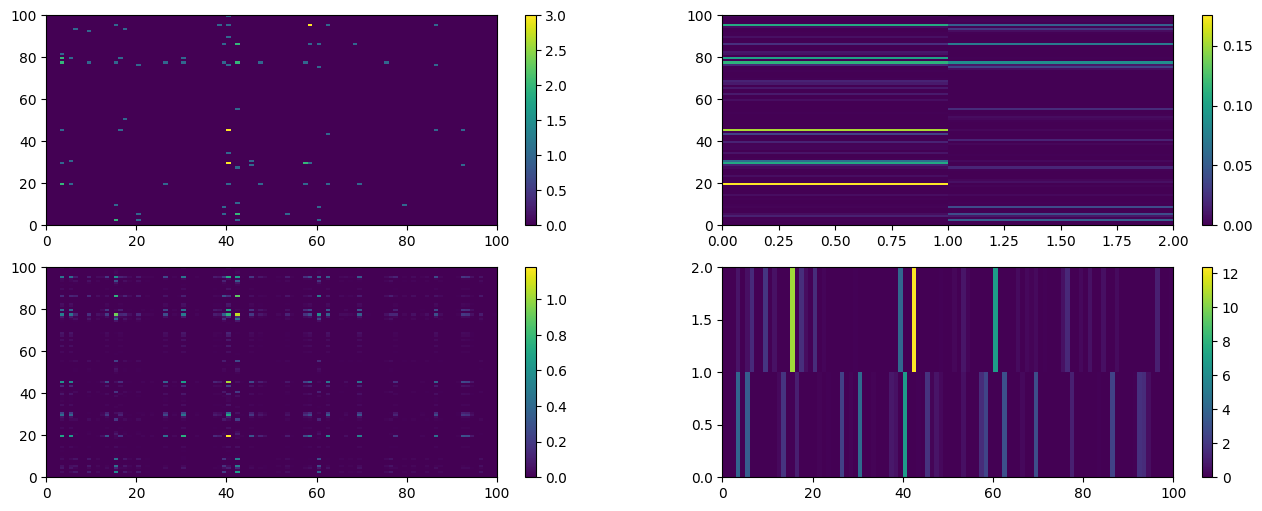

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(16,6))
plt.sca(axes[0, 0])
plt.pcolormesh(x_samples)
plt.colorbar()
plt.sca(axes[0, 1])
plt.pcolormesh(z_samples)
plt.colorbar()
plt.sca(axes[1, 0])
plt.pcolormesh(np.einsum('nk,kg->ng', z_samples, w_samples))
plt.colorbar()
plt.sca(axes[1, 1])
plt.pcolormesh(w_samples)
plt.colorbar()
plt.show()


# Gamma factorization
$$
z_{nk} \sim \Gamma\left(\alpha_1, \beta_1\right), \qquad
w_{kg} \sim \Gamma\left(\alpha_2, \beta_2\right)
$$

$$
x_{n} \sim \Gamma\left(a, \frac{b}{\sum_k z_{nk} * w_{kg}}\right) 
$$

In [63]:
n_samples = 100
K = 2
G = 100
alpha_1 = .1
beta_1 = 0.1
alpha = 1.

# theoretical_mean = alpha/beta
# theoretical_var = 

z_samples = np.random.gamma(alpha_1, 1./alpha_1, size=[n_samples, K])
w_samples = np.random.gamma(beta_1, 1./(beta_1 * K), size=[K, G])
x_samples = np.random.gamma(alpha, 1./(alpha/np.einsum('nk,kg->ng', z_samples, w_samples)))

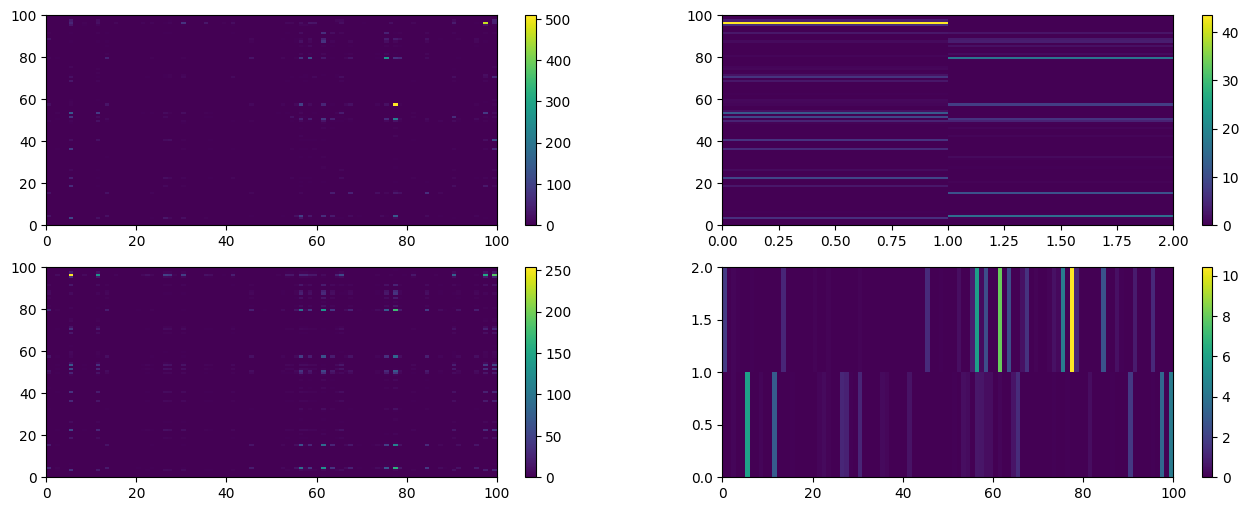

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(16,6))
plt.sca(axes[0, 0])
plt.pcolormesh(x_samples)
plt.colorbar()
plt.sca(axes[0, 1])
plt.pcolormesh(z_samples)
plt.colorbar()
plt.sca(axes[1, 0])
plt.pcolormesh(np.einsum('nk,kg->ng', z_samples, w_samples))
plt.colorbar()
plt.sca(axes[1, 1])
plt.pcolormesh(w_samples)
plt.colorbar()
plt.show()

# Deep Poisson factorization
$$
z^2_{nj} \sim \Gamma\left(\alpha_2, \alpha_2\right), \qquad
w^2_{jl} \sim \Gamma\left(\beta_2, \beta_2\right)
$$

$$
z^1_{nk} \sim \Gamma\left(\alpha_1, \frac{\alpha_1}{\sum_k z^2_{nj} * w^1_{jl}}\right), \qquad
w^1_{lk} \sim \Gamma\left(\beta_1, \beta_1\right)
$$

$$
z_{nk} \sim \Gamma\left(\alpha, \frac{\alpha}{\sum_k z^1_{nl} * w^1_{lk}}\right), \qquad
w_{kg} \sim \Gamma\left(\beta, \beta\right)
$$

$$
x_{n} \sim Poisson\left(\sum_k z_{nk} * w_{kg}\right) 
$$

In [9]:
n_samples = 200
J = 10
L = 20
K = 50
G = 100
alpha_2 = .1 # prior for z2
beta_2 = .1 # prior for w2

alpha_1 = 1. # prior for z1
beta_1 = .1 # prior for w1

alpha = 1. # prior for z
beta = 1. # prior for w

# top alpha has to be sparse enough to be small, keeping the overall variance down to allow the bottom alpha to be small too such that it
# can learn, while keeping some bound on the variance to learn something...

# theoretical_mean = alpha/beta
# theoretical_var = 

z2_samples = np.random.gamma(alpha_2, 1./(1.), size=[n_samples, J])
w2_samples = np.random.gamma(beta_2, 1./(beta_2 * J**1), size=[J, L])
z1_samples = np.random.gamma(alpha_1, 1./(alpha_1/np.einsum('nk,kg->ng', z2_samples, w2_samples)))
# z1_samples = np.random.gamma(alpha_1, 1./alpha_1, [n_samples, L])
w1_samples = np.random.gamma(beta_1, 1./(beta_1 * L**1), size=[L, K])
z_samples = np.random.gamma(alpha, 1./(alpha/np.einsum('nk,kg->ng', z1_samples, w1_samples)))
w_samples = np.random.gamma(beta, 1./(beta * K**1), size=[K, G])
x_samples = np.random.poisson(np.einsum('nk,kg->ng', z_samples, w_samples))

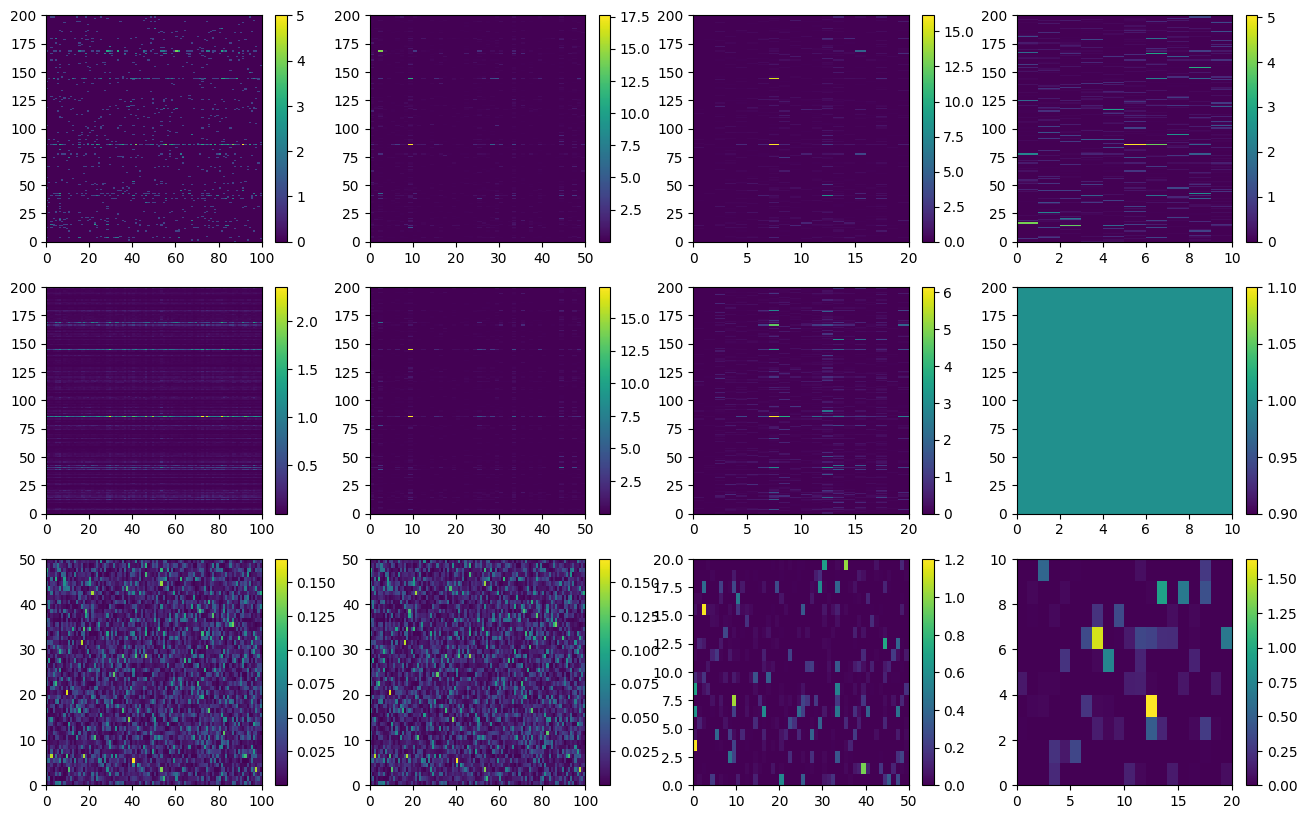

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(16,10))
plt.sca(axes[0,0])
plt.pcolormesh(x_samples)
plt.colorbar()
plt.sca(axes[0,1])
plt.pcolormesh(z_samples)
plt.colorbar()
plt.sca(axes[0,2])
plt.pcolormesh(z1_samples)
plt.colorbar()
plt.sca(axes[0,3])
plt.pcolormesh(z2_samples)
plt.colorbar()

plt.sca(axes[1,0])
plt.pcolormesh(np.einsum('nk,kg->ng', z_samples, w_samples))
plt.colorbar()
plt.sca(axes[1,1])
plt.pcolormesh(np.einsum('nk,kg->ng', z1_samples, w1_samples))
plt.colorbar()
plt.sca(axes[1,2])
plt.pcolormesh(np.einsum('nk,kg->ng', z2_samples, w2_samples))
plt.colorbar()
plt.sca(axes[1,3])
plt.pcolormesh(z2_samples * 0 + 1)
plt.colorbar()

plt.sca(axes[2,0])
plt.pcolormesh(w_samples)
plt.colorbar()
plt.sca(axes[2,1])
plt.pcolormesh(w_samples)
plt.colorbar()
plt.sca(axes[2,2])
plt.pcolormesh(w1_samples)
plt.colorbar()
plt.sca(axes[2,3])
plt.pcolormesh(w2_samples)
plt.colorbar()

plt.show()

In [ ]:
# Let's think of it like this: I had the 100<-10 factorization. How do I make sure it works the same after adding
# the 100<-50<-10 factorization? Or rather, 
# UNDER APPROPRIATE PARAMETERIZATION:
# 100 <- 10. I find 10 signatures to describe the variation on 100 dims.
# 100 <- 50 <- 10. I find 50 signatures to describe the variation on 100 dims, and 10 signatures to describe the variation on 50 dims.
# The 100 is now less contrained, because it can use 50 dims on top. But those 
#...

# Maybe it is true that 100 <- 50 <- 10 would lead to the same 100 <- 10. The point is to obtain the intermediate layers to learn a hierarchy
# So in this sense, the very sparse NMF is the only thing driving the batch correction.
# https://proceedings.mlr.press/v70/zhao17c/zhao17c.pdf
# " if these models can be trained to optimality, then the bottom layer alone contains enough information to 
# reconstruct the data distribution, and the layers above the first one can be ignored."
# These guys then go on to say they can setup the 100 <- 10 such that the hierarchy appears in 10. But then I don't have the explicit graph..

# They prove this for the Gaussian case. Can I show that for my Gamma case this is not true? I mean, the DEF paper shows it does learn a
# hierarchy... And maybe in my case it is also true that the two cases are not equivalent? 
# -> Can I adapt their proofs to my case to get support for my hypothesis that I can indeed learn something useful?

# And it looks like I can use this paper to prove it too: Deep Semi-NMF
# https://opus.bibliothek.uni-augsburg.de/opus4/frontdoor/deliver/index/docId/72016/file/72016.pdf
# "More over, due to the non-negativity constrains we enforce on the latent features HðÞ, it should be noted that this model does not 
# collapse to a Semi-NMF model"
# These guys agree with my intuition (but they don't prove it)
# They mention that actually the Deep model can result in the lower layer being slightly worse because the optimization problem
# is more difficult

# So, let's assume I am correct and I can prove it. 
# How does the parameterization influence the hierarchical features that I learn (good and bad!)?
# Assuming perfect global optimization:
# having large \alpha for z, how does x behave?

# Poisson variance will be very large as the mean becomes large. So for dot products that generate large values,
# there will be a lot of data that fits it. 
# So smaller values of hW will lead to more identifiable parameters from the data

# The Gamma variance is even larger -- it's the square! So to get something behaving similarly to the Poisson, 
# I need to parameterize such that the variance has a 1/K term
# Var = \alpha / (\beta / prod e[z]e[w])**2 = (alpha/beta**2) since e[w] = 1/K. So actually the variance is... 1!! I don't think I can do
# that... The variance in the z is too big
# I need a big \alpha to get the same behavior in Poisson and in Gamma factorization
# I need sparse Ws. In PF, sparse alpha is great. Same in GF, as long as I have a strong enough bottom alpha
# The issue is then the one I know: the bottom alpha I need for the top alpha to be identified leads to no structure in the bottom PF. 
# Is the savior in w?

In [ ]:
# And in terms of the optimization; maybe first fit a model with strong inheritance, and then relax it? (and learn)